In [3]:
from IPython.display import display, Image  # This line lets you display images. We'll use that in a bit.

# This line lets you use python to download data from the web.
import requests

### Exercise 1

Write a function that takes in the width and height and prints an image

In [14]:
r = requests.get('http://www.placecats.com/2000/300')

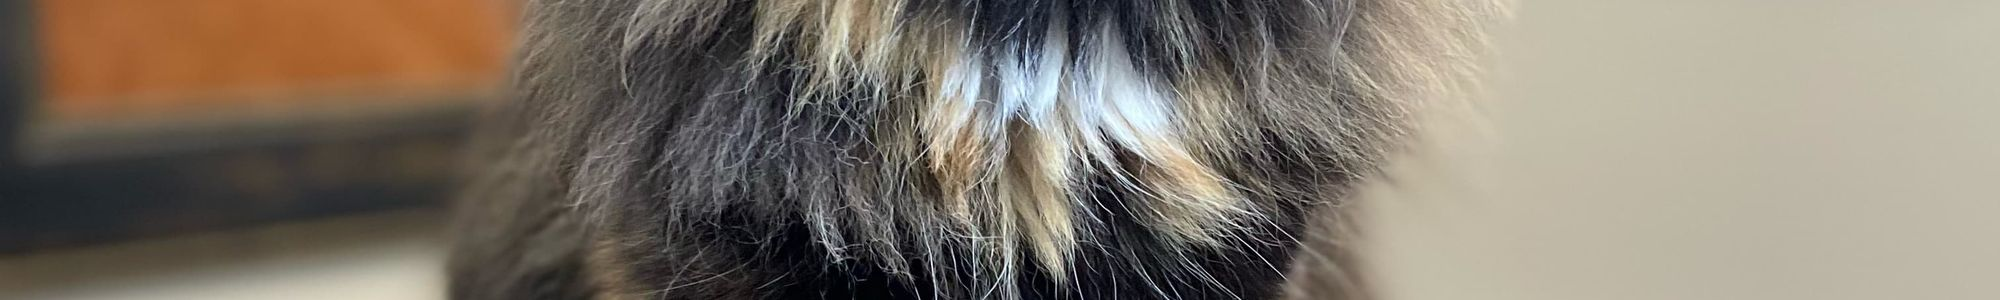

In [15]:
display(Image(r.content))#, width=200, height=100))

In [16]:
def get_kitten(width, height):
    r = requests.get(f'http://www.placecats.com/{width}/{height}')
    display(Image(r.content))

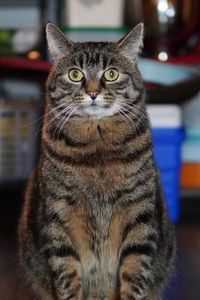

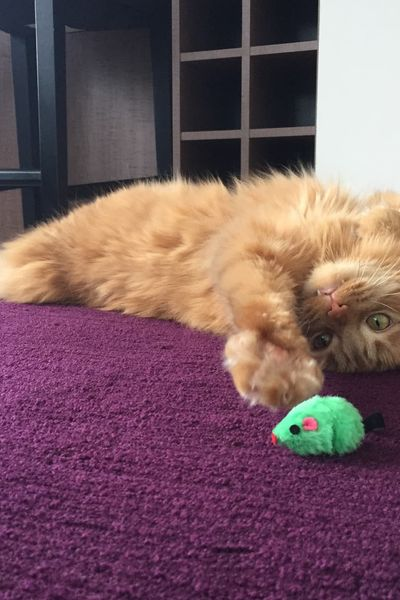

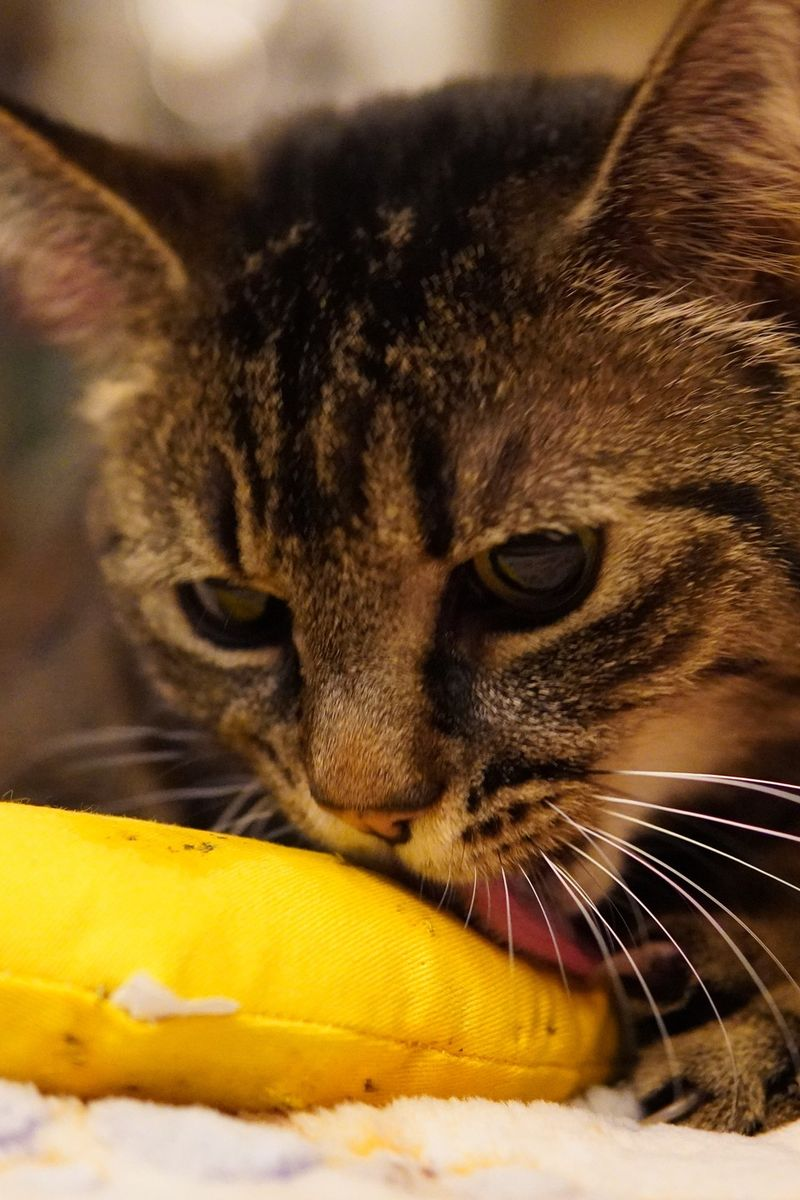

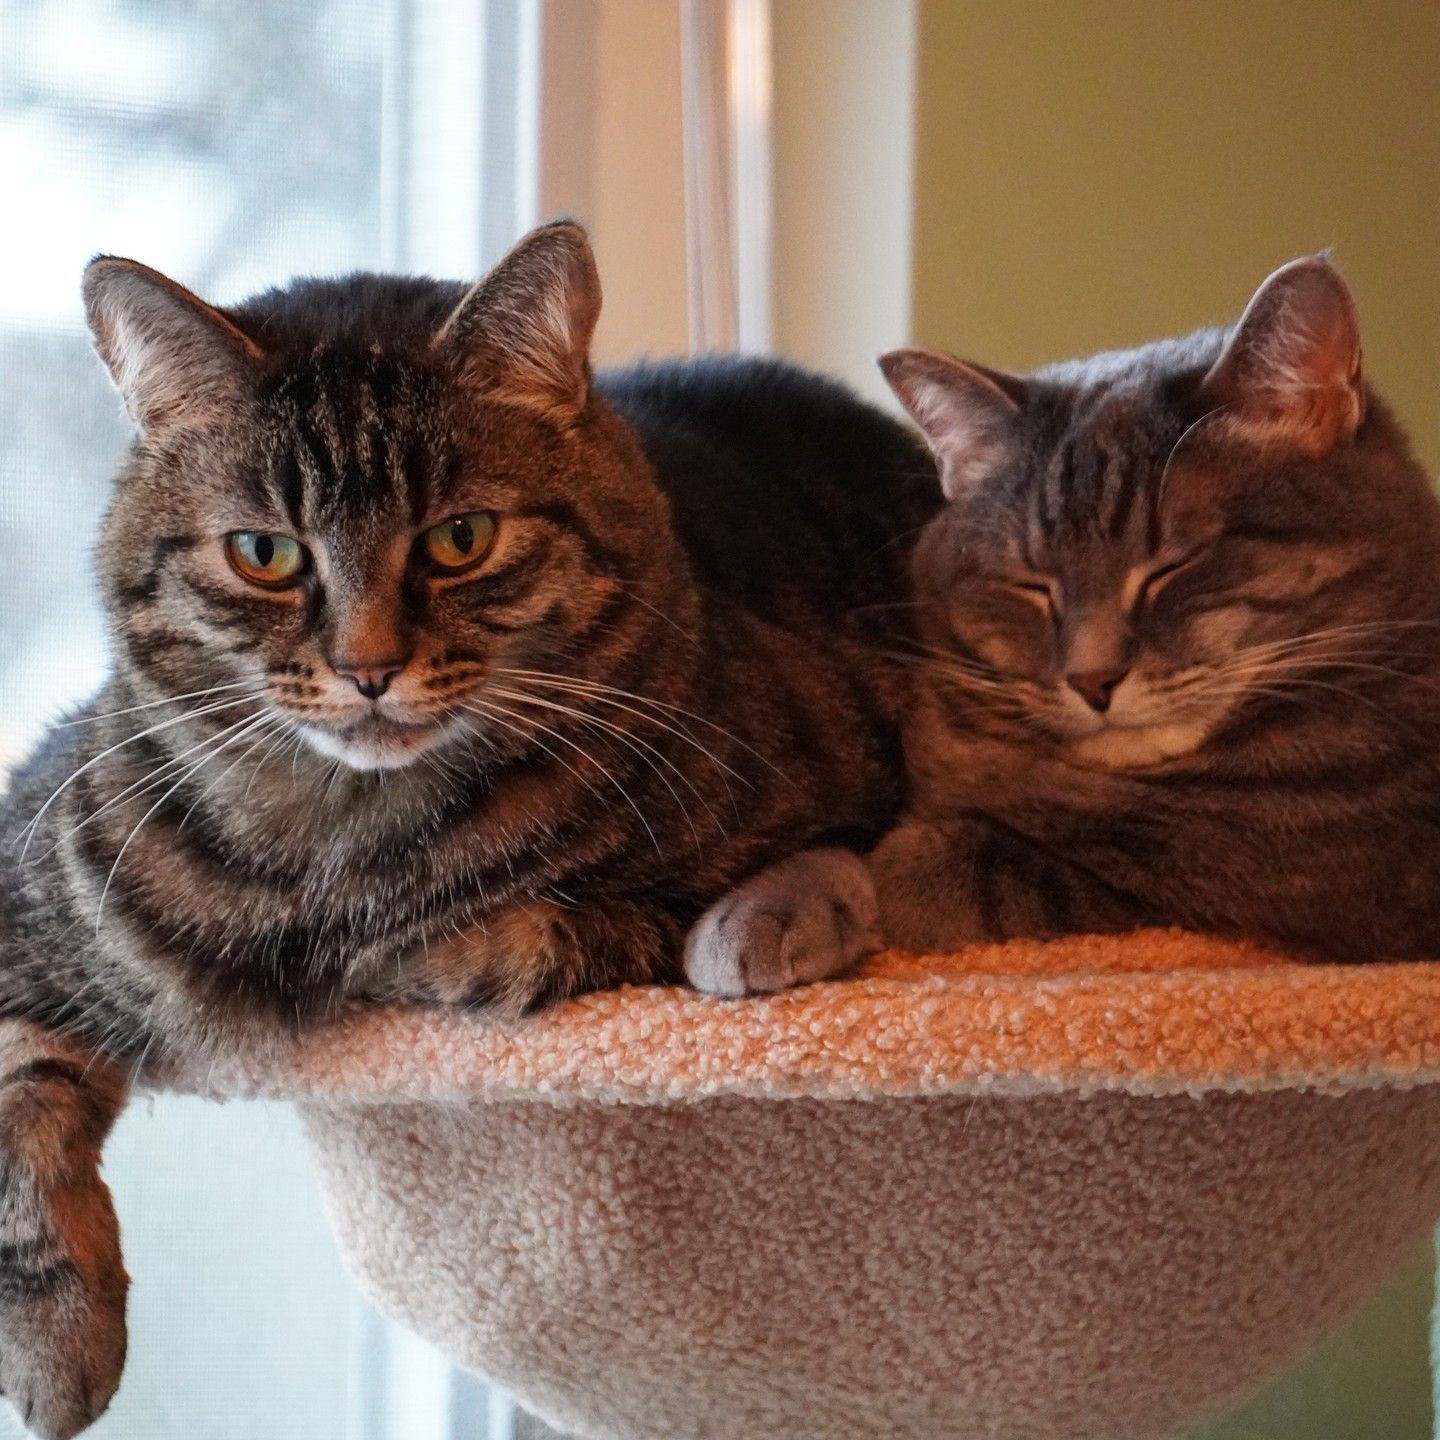

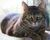

In [19]:
dimensions = [(200, 300), (400, 600), (800, 1200), (1600, 2400)]
for width, height in dimensions:
    get_kitten(width, height)

for width in [20,30,50]:
    for height in [20,30,40]:
        get_kitten(width, height)

### Exercise 2

Can you write a loop to show several images?


### Exercise 3

Use the .json() function to get the response converted to a dictionary or list

In [7]:
r = requests.get("http://worldtimeapi.org/api/timezone")
print(r.json())

['Africa/Abidjan', 'Africa/Algiers', 'Africa/Bissau', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/El_Aaiun', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Khartoum', 'Africa/Lagos', 'Africa/Maputo', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Sao_Tome', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'America/Adak', 'America/Anchorage', 'America/Araguaina', 'America/Argentina/Buenos_Aires', 'America/Argentina/Catamarca', 'America/Argentina/Cordoba', 'America/Argentina/Jujuy', 'America/Argentina/La_Rioja', 'America/Argentina/Mendoza', 'America/Argentina/Rio_Gallegos', 'America/Argentina/Salta', 'America/Argentina/San_Juan', 'America/Argentina/San_Luis', 'America/Argentina/Tucuman', 'America/Argentina/Ushuaia', 'America/Asuncion', 'America/Bahia', 'America/Bahia_Banderas', 'America/Barbados', 'America/Belem', 'America/Belize', 'America/Boa_Vista', 'America/Bogota', 'America/Boise', 'America/Cambridge_Bay', 'America/Campo_Grande', 'America/Cancun'

### Exercise 4

Get the time for your time zone

In [13]:
time_zones = ['America/Indiana/Indianapolis']


In [16]:
for time_zone in time_zones:
    r = requests.get('http://worldtimeapi.org/api/timezone/' + time_zone)
    data = r.json()
    print(data['datetime'])    

TypeError: 'int' object is not iterable

In [15]:
time_zones = 5

### Exercise 5

Get the time for your IP address

In [9]:
r = requests.get('http://worldtimeapi.org/api/ip')

r.json()

{'abbreviation': 'EDT',
 'client_ip': '128.210.107.131',
 'datetime': '2023-10-26T11:15:41.324887-04:00',
 'day_of_week': 4,
 'day_of_year': 299,
 'dst': True,
 'dst_from': '2023-03-12T07:00:00+00:00',
 'dst_offset': 3600,
 'dst_until': '2023-11-05T06:00:00+00:00',
 'raw_offset': -18000,
 'timezone': 'America/Indiana/Indianapolis',
 'unixtime': 1698333341,
 'utc_datetime': '2023-10-26T15:15:41.324887+00:00',
 'utc_offset': '-04:00',
 'week_number': 43}

## Exercise 6

Review the documentation (and Google) to see if you can figure out how to get a list of all of the users who have ever edited the most recently edited Wikipedia page.

In [30]:
endpt = 'https://en.wikipedia.org/w/api.php'


def get_last_pages_changed(n):
    params = {'action': 'query',
          'format': 'json',
          'list': 'recentchanges',
          'rcnamespace': '0',
          'rclimit': n}
    r = requests.get(endpt, params=params)
    #print(r.json())
    #print(r.json()['query']['recentchanges'])
    result = []
    content = r.json()['query']['recentchanges']
    for page in content:
        result.append(page['title'])
    return result


def get_contributors():
    result = []
    while True:
        params = {'action': 'query',
          'format': 'json',
          'prop': 'contributors',
          'titles': get_last_pages_changed(1)[0],
            'pclimit': 500}
        r = requests.get(endpt, params=params)
        #print(r.json())
        info = r.json()['query']['pages']
        for page, page_info in info.items():
            contributors = page_info['contributors']
            for user in contributors:
                result.append(user['name'])
        try:
            pccontinue = r.json()['continue']['pccontinue']
            params['pccontinue'] = pccontinue
        except KeyError:
            break
    return result

In [36]:

def get_edits(title):
    params = {'action':'query',
         'prop':'revisions',
         'titles': title,
              'format': 'json',
          'rvlimit': 500,
          'rvprop': 'user|timestamp'
         }
    r = requests.get(endpt, params=params)
    return r.json()
    
get_edits('Purdue University')

{'continue': {'rvcontinue': '20200422051357|952427895', 'continue': '||'},
 'query': {'pages': {'23757': {'pageid': 23757,
    'ns': 0,
    'title': 'Purdue University',
    'revisions': [{'user': 'EmyRussell', 'timestamp': '2023-10-06T20:06:29Z'},
     {'user': 'Viewmont Viking', 'timestamp': '2023-10-05T13:37:14Z'},
     {'user': 'Tabkaa', 'timestamp': '2023-10-05T13:25:23Z'},
     {'user': '198.208.47.87',
      'anon': '',
      'timestamp': '2023-10-02T14:46:15Z'},
     {'user': 'Rhurst1945', 'timestamp': '2023-10-02T03:30:21Z'},
     {'user': 'Invinciblewalnut', 'timestamp': '2023-09-29T16:55:17Z'},
     {'user': 'Invinciblewalnut', 'timestamp': '2023-09-29T16:53:20Z'},
     {'user': 'Melchior2006', 'timestamp': '2023-09-28T04:22:00Z'},
     {'user': 'Melchior2006', 'timestamp': '2023-09-27T08:15:20Z'},
     {'user': 'Reywas92', 'timestamp': '2023-09-27T04:22:13Z'},
     {'user': 'Invinciblewalnut', 'timestamp': '2023-09-26T15:33:53Z'},
     {'user': 'Melchior2006', 'timestamp': 

In [45]:
last_page_changed = get_last_pages_changed(n=1)

result = []

r = get_edits(last_page_changed[0])
pages = r['query']['pages']
for page, page_info in pages.items():
    for revision in page_info['revisions']:
        result.append(revision['user'])

In [46]:
result

['Koavf',
 'YGO24895',
 'GregK123',
 'GregK123',
 'JJMC89 bot III',
 'GreenC bot',
 'Lennart97',
 'Ser Amantio di Nicolao',
 'Tobyjamesaus',
 'NavyBlueSunglasses',
 'Robvanvee',
 'Neodop',
 '98.118.36.112',
 'GünniX',
 'Teflon Peter Christ',
 'Tonyrocksoff',
 'Tonyrocksoff',
 'Binksternet',
 '158.174.5.52',
 'Jon Kolbert',
 'KolbertBot',
 'Robvanvee',
 '71.184.149.83',
 '71.184.149.83',
 '71.184.149.83',
 'Robvanvee',
 '71.184.149.83',
 'Snkcube',
 '98.118.88.190',
 '108.49.157.4',
 '174.52.215.176',
 'GregK123',
 'GregK123',
 'Robvanvee',
 '69.253.121.213',
 'Walor',
 'Gbawden',
 '192.149.97.2',
 '124.197.62.177',
 'Robvanvee',
 '90.157.149.139',
 '90.157.149.139',
 'RansomG',
 'RansomG',
 'RansomG',
 'Addbot',
 '213.57.89.71',
 'Teflon Peter Christ',
 '193.190.253.144',
 'JackieBot',
 'TimDuncan',
 'TimDuncan',
 'TimDuncan',
 'Equilibrial',
 'Equilibrial',
 'Michig',
 'Michig',
 'Petertoshsteppingrazor',
 'Michig',
 '81.100.199.25',
 'CactusBot',
 'Michig',
 '81.100.197.253',
 'SQGib

In [41]:
revisions

{'75033906': {'pageid': 75033906,
  'ns': 0,
  'title': 'Shillington Hoard',
  'revisions': [{'user': 'Citation bot', 'timestamp': '2023-10-19T15:41:09Z'},
   {'user': 'StAnselm', 'timestamp': '2023-10-13T13:58:22Z'},
   {'user': 'StAnselm', 'timestamp': '2023-10-12T02:25:40Z'},
   {'user': 'StAnselm', 'timestamp': '2023-10-11T23:19:58Z'},
   {'user': 'StAnselm', 'timestamp': '2023-10-11T22:43:50Z'},
   {'user': 'StAnselm', 'timestamp': '2023-10-11T22:40:37Z'},
   {'user': 'StAnselm', 'timestamp': '2023-10-11T22:39:53Z'},
   {'user': 'StAnselm', 'timestamp': '2023-10-11T22:39:13Z'}]}}

In [27]:
get_contributors()

['Narky Blert',
 'InternetArchiveBot',
 'AnomieBOT',
 'Cydebot',
 'KylieTastic',
 'Citation bot',
 'Histohob',
 'Sandstein',
 'BD2412',
 'Niceguyedc',
 'Alansohn',
 'Srich32977',
 'Muboshgu',
 'Ser Amantio di Nicolao',
 'Tom.Reding',
 'MER-C',
 'SmackBot',
 'ClueBot',
 'Rjwilmsi',
 'Yobot',
 'Addbot',
 'Bender235',
 'BrownHairedGirl',
 'Chris the speller',
 'Kinvidia',
 'JohnInDC',
 'Discospinster',
 'David Eppstein',
 'Dicklyon',
 'BabaRamDevi',
 'Neutrality',
 'Ground Zero',
 'Lindenfall',
 'Rockhead126',
 'Auric',
 'Adavidb',
 'Zinnober9',
 'Gamaliel',
 'Hu',
 'Denniscabrams',
 'Hooperbloob',
 'Kzirkel',
 'LilHelpa',
 'Corkythehornetfan',
 'Helpful Pixie Bot',
 'Buidhe',
 'Larry Hockett',
 'Gab4gab',
 'Tyrol5',
 'Tassedethe',
 'Wikieditor19920',
 'Keith D',
 'Postdlf',
 'Woohookitty',
 'Tony1',
 'BattyBot',
 'Bender the Bot',
 'Johnpacklambert',
 'OrphanBot',
 'Cewbot',
 'El C',
 'ZéroBot',
 'Allenkong11',
 'PaulHanson',
 'The Anomebot2',
 'Mikeblas',
 'DocWatson42',
 'OccultZone',


## Exercises 7 and 8

7. Improve my code above so that it only gets comments if they have a positive score.


In [16]:
import praw
import reddit_authentication

# Create an instance called reddit. We'll use this to call the API.
reddit = praw.Reddit(client_id=reddit_authentication.client_id,
                     client_secret=reddit_authentication.client_secret,
                    user_agent = reddit_authentication.user_agent,
                    username = reddit_authentication.username,
                    password = reddit_authentication.password)

Version 7.6.1 of praw is outdated. Version 7.7.1 was released Tuesday July 11, 2023.


In [19]:
messages = reddit.inbox.all()

In [20]:
for message in messages:
    print(message.body)

No one was opposed so I've sent an invite to your bot.
The thread is locked or else I would have asked in the post.

What kinda shoes you got on there? It looks mighty comfortable! Is it?
Your post has been locked as it is an item found in our [FAT]( https://www.reddit.com/r/WITT_FAT/), which we encourage everyone to check before posting.
Hello! 

Do you have some examples of outcomes that you've seen with the bot from other subs? The mods have been talking it over and are considering the idea.
That nail is a survey control point and the white rectangle is a “target” used to align aerial images taken with a drone. 

Source: am a surveyor who uses this shit daily
Surveyor marking pin. They use various instruments at that specific spot to measure all kinds of stuff. Distances, elevations, etc.
It has a mag nail in the center so I feel like it’s being used as a specific location for something whether aerial survey or ground survey. Only a guess though.
Saw this googling “white squares in 

In [8]:
def get_items():
    x = x + 1
    yield x
    x += 1

In [9]:
for item in get_items():
    print(item)
    

UnboundLocalError: local variable 'x' referenced before assignment

In [4]:
[x for x in reddit.inbox.all()]

ResponseException: received 401 HTTP response

In [27]:
commenters = {}

for comment in reddit.subreddit('Purdue').comments(limit=3000):
    if comment.score > 0:
        if comment.author in commenters:
            commenters[comment.author] += 1
        else:
            commenters[comment.author] = 1

In [28]:

sorted_commenters = sorted(commenters.items(), key=lambda x: x[1], reverse=True)

In [31]:
top_commenters = sorted_commenters[:100]

In [32]:
top_commenters

[(Redditor(name='AutoModerator'), 26),
 (Redditor(name='Beastgupta'), 24),
 (Redditor(name='PP_Fang'), 22),
 (Redditor(name='Westporter'), 20),
 (Redditor(name='antistudysocial'), 13),
 (Redditor(name='Gerard_Way_01'), 12),
 (Redditor(name='Its-Mike-Jones'), 12),
 (Redditor(name='More-Surprise-67'), 11),
 (Redditor(name='ChristianPeng'), 11),
 (Redditor(name='StrawberryVisible336'), 11),
 (Redditor(name='Birds-AreNotReal'), 9),
 (Redditor(name='Danielator36'), 8),
 (Redditor(name='foreverlarz'), 8),
 (Redditor(name='zwroberts15'), 8),
 (Redditor(name='nevers1027'), 7),
 (Redditor(name='Layne1665'), 7),
 (Redditor(name='Brabsk'), 7),
 (Redditor(name='koreanfraud7'), 7),
 (Redditor(name='Voxtrium'), 6),
 (Redditor(name='Ok-Independence-1872'), 6),
 (Redditor(name='itakeskypics'), 6),
 (Redditor(name='sececoko'), 6),
 (Redditor(name='81659354597538264962'), 6),
 (Redditor(name='AlwaysEntropic'), 5),
 (Redditor(name='rational_approach3'), 5),
 (Redditor(name='niksjman'), 5),
 (Redditor(nam


8. See if you can figure out how to get the "comment karma" for each of the users in our dictionary, and print out the top 10 users by comment karma.

In [3]:
import time

def wait_and_add(x,y):
    time.sleep(10)
    return x + y

In [9]:
d = {'x': 1, 'y': 2, 'z': 0}

sorted(d, key=return_value)

['z', 'x', 'y']

In [12]:
import pandas as pd
df = pd.DataFrame({'x': [1,2,3], 'y': [4,-5,6], 'z': [7,8,9]})

In [15]:
df.sort_values(by='y', key=lambda x: abs(x))

,x,y,z
0,1,4,7
1,2,-5,8
2,3,6,9


## Exercise 9 (Challenge Exercise)

Instead of storing the number of total comments per subreddit, store the number of our top_commenters who contribute to each subreddit. In other words, if User A comments on Subreddit A twice, my code counts that twice. Instead, I want to count that only once.

Hint: This is tricky. One approach would be to make a list of subreddits that each commenter has commented in, and then change that into a set. 

In [33]:

subreddits = {}

for commenter in top_commenters:
    print(f"Now looking at {commenter[0]}'s comments")
    user = commenter[0]
    # Get the user's 100 most recent comments
    curr_user_subreddits = []
    for comment in user.comments.new(limit=100):
        subreddit = comment.subreddit.display_name
        if subreddit == 'Purdue':
            continue
        curr_user_subreddits.append(subreddit)
    curr_user_subreddits = set(curr_user_subreddits)
    for subreddit in curr_user_subreddits:
        if subreddit in subreddits:
            subreddits[subreddit] += 1
        else:
            subreddits[subreddit] = 1

In [37]:
sorted(subreddits.items(), key=lambda x: x[1], reverse=True)

[('AskReddit', 28),
 ('ApplyingToCollege', 14),
 ('AmItheAsshole', 10),
 ('college', 10),
 ('NoStupidQuestions', 8),
 ('mildlyinteresting', 8),
 ('facepalm', 8),
 ('csMajors', 7),
 ('mildlyinfuriating', 7),
 ('Damnthatsinteresting', 7),
 ('cats', 7),
 ('therewasanattempt', 6),
 ('APStudents', 6),
 ('lafayette', 6),
 ('Wellthatsucks', 6),
 ('aviation', 5),
 ('TikTokCringe', 5),
 ('funny', 5),
 ('todayilearned', 5),
 ('TrueOffMyChest', 5),
 ('ask', 4),
 ('CFB', 4),
 ('technicallythetruth', 4),
 ('mapporncirclejerk', 4),
 ('GenZ', 4),
 ('teenagers', 4),
 ('Indiana', 4),
 ('ProgrammerHumor', 4),
 ('WhitePeopleTwitter', 4),
 ('relationship_advice', 4),
 ('nfl', 4),
 ('greentext', 3),
 ('gaming', 3),
 ('PurdueHousing', 3),
 ('ChatGPT', 3),
 ('Sat', 3),
 ('pics', 3),
 ('Destiny', 3),
 ('FluentInFinance', 3),
 ('wallstreetbets', 3),
 ('gradadmissions', 3),
 ('news', 3),
 ('Adulting', 3),
 ('texts', 3),
 ('Showerthoughts', 3),
 ('unpopularopinion', 3),
 ('ImTheMainCharacter', 3),
 ('TrueUnpopul

## Additional Exercises

10. Get the last comments across all subreddits. Figure out which subreddits were most actively commented in.
11. Get the last comments across all subreddits. Figure out which users were most active.
12. Find the top 5 posts on the Purdue subreddit over the last year ([HINT](https://praw.readthedocs.io/en/stable/code_overview/models/subreddit.html#praw.models.Subreddit.top)). Get all of the comments for each of those posts.

In [26]:
comments = []
for comment in reddit.subreddit('all').stream.comments():
    if len(comments) >= 5000:
        break
    comments.append(comment)

In [35]:
subreddit_count = {}
for comment in comments:
    sr = comment.subreddit.display_name
    if sr in subreddit_count:
        subreddit_count[sr] += 1
    else:
        subreddit_count[sr] = 1

print(sorted(subreddit_count.items(), key=lambda x: x[1], reverse=True))

[('AskReddit', 80), ('AmItheAsshole', 34), ('politics', 34), ('NoStupidQuestions', 27), ('BaldursGate3', 23), ('AITAH', 22), ('fantasyfootball', 22), ('Starfield', 21), ('CFB', 19), ('facepalm', 19), ('nfl', 18), ('texts', 17), ('worldnews', 16), ('Cricket', 15), ('nba', 14), ('gaming', 14), ('AskRedditAfterDark', 13), ('TrueOffMyChest', 13), ('WhitePeopleTwitter', 13), ('ask', 12), ('teenagers', 12), ('wallstreetbets', 12), ('CrazyFuckingVideos', 11), ('argentina', 10), ('PublicFreakout', 10), ('memes', 10), ('relationship_advice', 10), ('indiasocial', 10), ('Destiny', 10), ('DnD', 10), ('SipsTea', 10), ('news', 10), ('AskUK', 9), ('CasualUK', 9), ('Genshin_Impact', 9), ('changemyview', 9), ('SpidermanPS4', 9), ('AskMen', 9), ('therewasanattempt', 9), ('movies', 9), ('MortalKombat', 9), ('chubby', 9), ('wow', 8), ('starcitizen', 8), ('neoliberal', 8), ('PeterExplainsTheJoke', 8), ('todayilearned', 7), ('personalfinance', 7), ('soccer', 7), ('deadbydaylight', 7), ('Adulting', 7), ('dia